<b>Time Series Forecasting</b><br>
Time series forecasting is a technique for the prediction of events through a sequence of time.
There are two main goals of time series analysis:<br>
(a) identifying the nature of the phenomenon represented by the sequence of observations, and<br>
(b) forecasting (predicting future values of the time series variable). 

<b>Stages in Time Series Forecasting</b>
1. Visualizing time series
2. Stationarising time series
3. Finding the best parameters for our model
4. Fitting model
5. Predictions

<b>Problem Statement</b><br>
It shows the consumption of electricity from 1985 till 2018. The goal is to predict electricity consumption for the next 6 years i.e. till 2024.

In [1]:
# import the necessary Module
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [11]:
path="D:/timeseries/dataset_timeseries/"

In [13]:
path

'D:/timeseries/dataset_timeseries/'

In [15]:
df = pd.read_csv(path+'Electric_Production.csv')

In [16]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [19]:
df.shape

(397, 2)

In [22]:
print(df.DATE.min())
print(df.DATE.max())

01-01-1985
12-01-2017


In [25]:
df.columns=['Date', 'Consumption']

In [27]:
df.isna().any()

Date           False
Consumption    False
dtype: bool

In [28]:
df['Date']=pd.to_datetime(df['Date'])

In [29]:
df.set_index('Date', inplace=True)
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## Time Series Visualization
Visualization plays an important role in time series analysis and forecasting.

Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality that can influence the choice of model

Lets's take a look at 6 different types of visualizations that we can use on your own time series data. They are:

1.Line Plots.<br>
2.Histograms and Density Plots.<br>
3.Box and Whisker Plots.<br>
4.Heat Maps.<br>
5.Lag Plots or Scatter Plots.<br>
6.Autocorrelation Plots.<br>

## Let us start with our predefined steps:

<h3>A. Visualizing the time series.</h3><br>
<b>1.Time Series Line Plot</b><br>

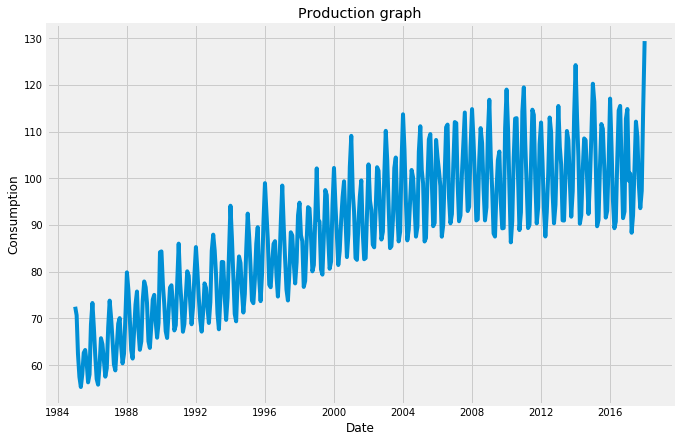

In [41]:
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Production graph')
plt.plot(df)
plt.show()

<b>NOTE:</b><br>
    Remember that for time series forecasting, a series needs to be stationary. The series should have a <b>constant mean, variance, and covariance.</b><br>
There are few points to  be noted here, <b>the mean is not constant in this case as we can clearly see an upward trend.</b>
Hence, we have identified that our series is not stationary.<b> We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.</b>

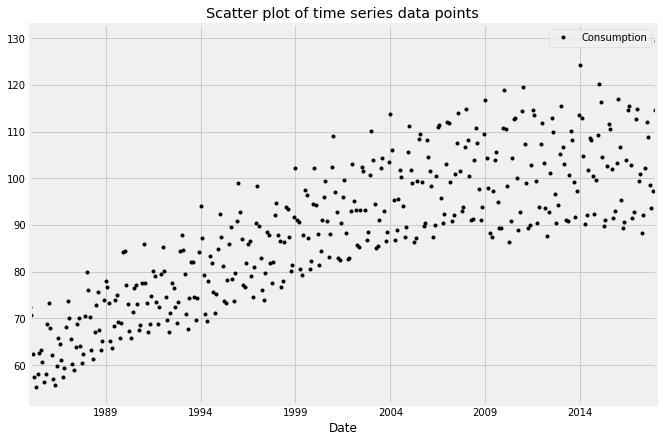

In [39]:
df.plot(style='k.')
plt.title('Scatter plot of time series data points')
plt.show()

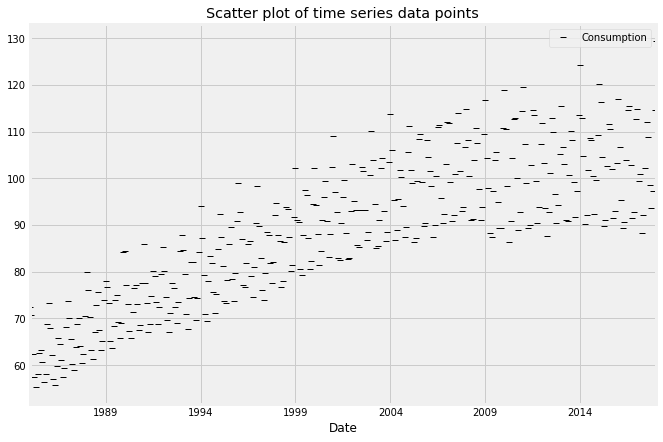

In [48]:
df.plot(style='k_')
plt.title('Scatter plot of time series data points')
plt.show()

##### Note:It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

In [51]:
# from pandas import DataFrame
# from pandas import Grouper
# groups = df.groupby(Grouper(freq='A'))
# years = DataFrame()
# for name, group in groups:
#     years[name.year] = group.values
# years.plot(subplots=True, legend=False)
# pyplot.show()

## 2. Time Series Histogram and Density Plots

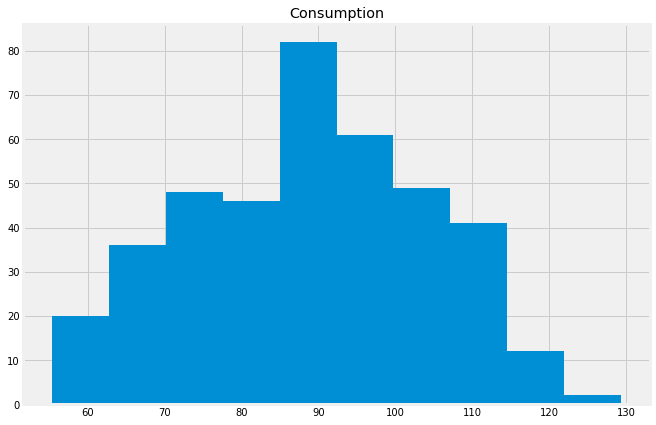

In [54]:
df.hist()
plt.show()

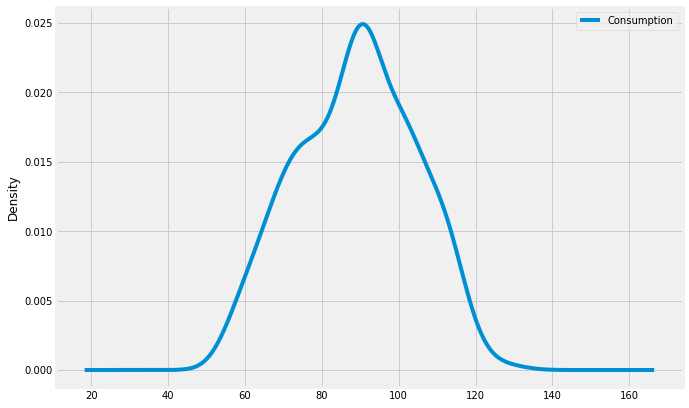

In [56]:
df.plot(kind='kde')
plt.show()

<b>Above</b><br>
We can observe a near-normal distribution(bell-curve) over consumption values.
Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.<br>

These components are defined as follows:

1.<b>Level</b>: The average value in the series.<br>
2.<b>Trend</b>: The increasing or decreasing value in the series.<br>
3.<b>Seasonality</b>: The repeating short-term cycle in the series.<br>
4.<b>Noise</b>: The random variation in the series.<br>

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

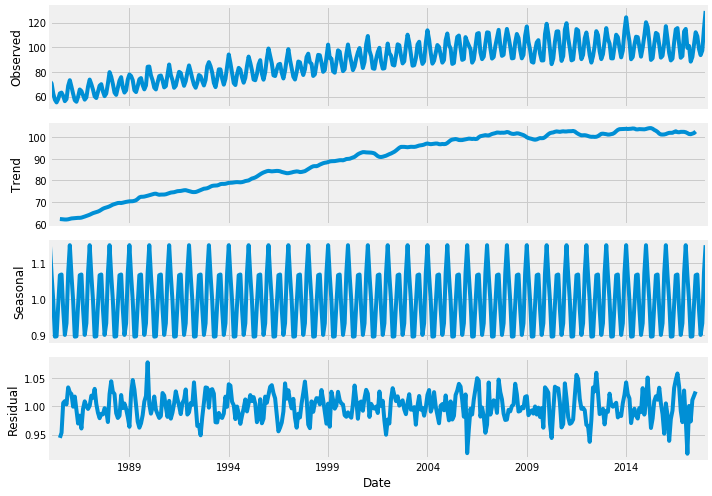

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.

### 3. Time Series Box and Whisker Plots by Interval

In [60]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv(path+'Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
plt.figure(figsize=(10,10))
years.boxplot()
plt.show()

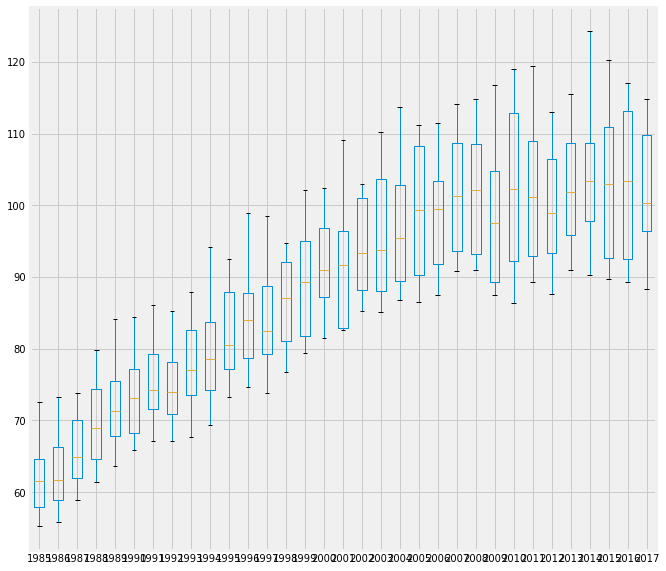

In [74]:
# Per Year Whisker plot

In [75]:
#Similarily for monthwise for a particular Year
# create a boxplot of monthly data
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import Grouper
# from matplotlib import pyplot
# from pandas import concat
# one_year = series['1990']
# groups = one_year.groupby(Grouper(freq='M'))
# months = concat([DataFrame(x[1].values) for x in groups], axis=1)
# months = DataFrame(months)
# months.columns = range(1,13)
# months.boxplot()
# pyplot.show()

## Time Series Heat Maps

In [77]:

# groups = series.groupby(Grouper(freq='A'))
# years = DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# years = years.T
# pyplot.matshow(years, interpolation=None, aspect='auto')
# pyplot.show()

## 5. Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation.
Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.
A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

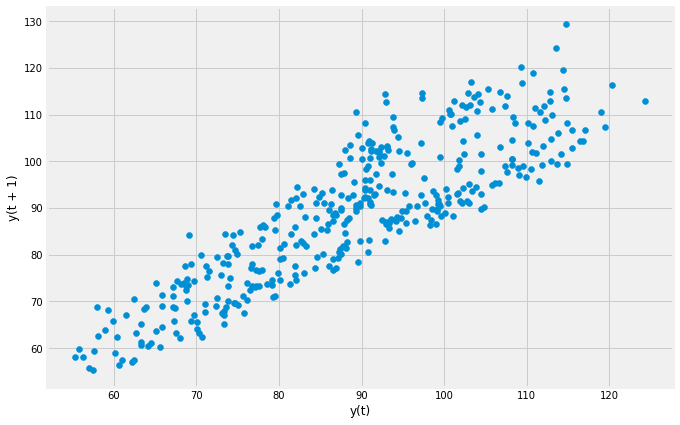

In [78]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.

For example, we can create a scatter plot for the observation with each value in the previous seven days.

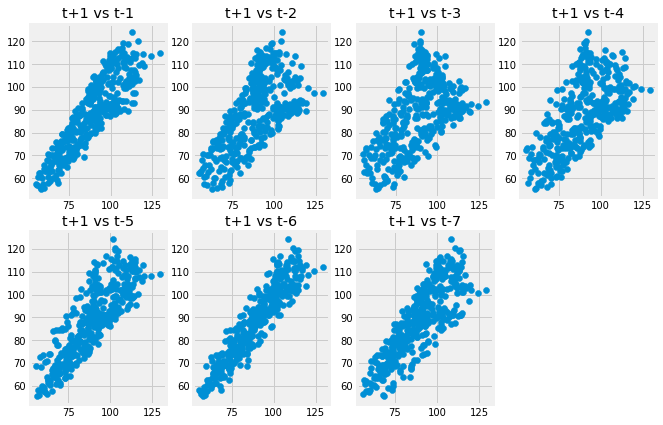

In [79]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
series = read_csv(path+'Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

### 6. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

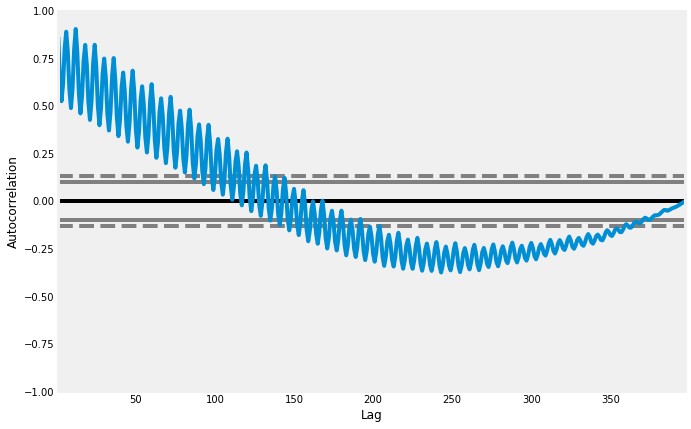

In [80]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

## 2. Stationarising the time series.

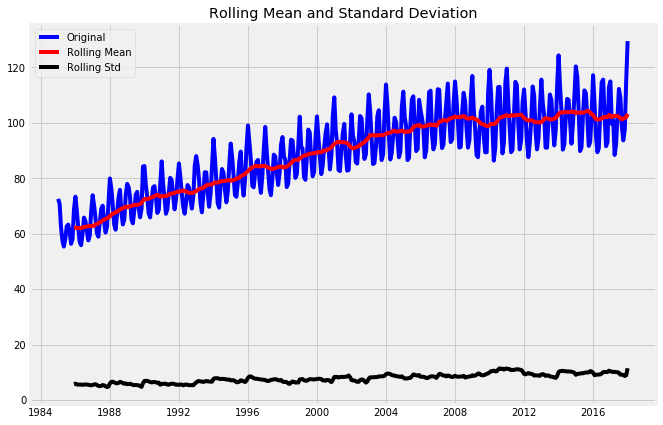

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [81]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

## Note:
We see that the p-value is greater than 0.05 so we cannot reject the <b>Null hypothesis</b>. Also, the test statistics is greater than the critical values. so the data is non-stationary.

To get a stationary series, we need to eliminate the trend and seasonality from the series.

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

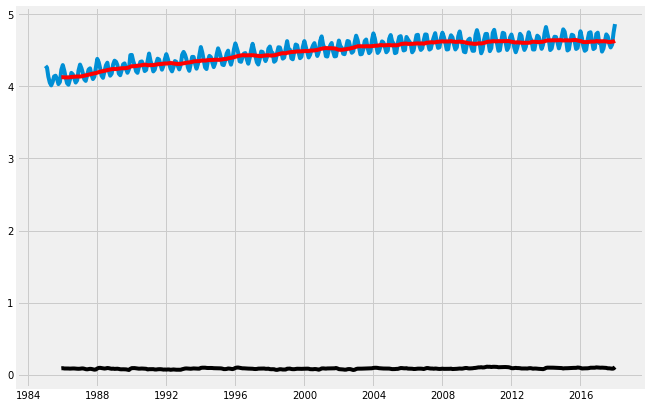

In [82]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.
This way, we eliminate trends out of a series and obtain a more stationary series.

In [83]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.

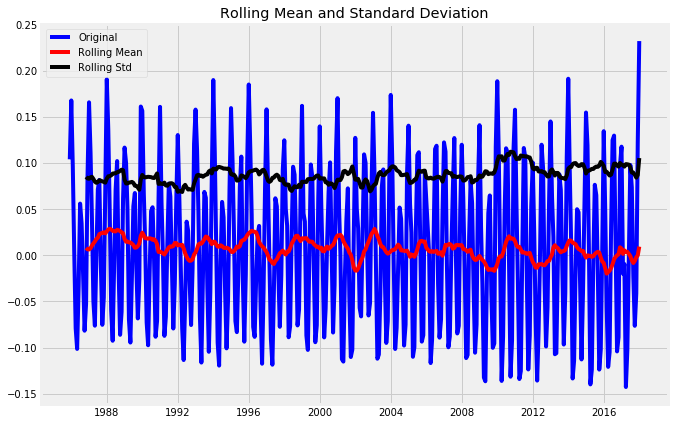

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [84]:
test_stationarity(df_log_moving_avg_diff)

From the above graph, we observed that the data attained stationarity.

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.

In [85]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

In [87]:
#test_stationarity(weighted_average)


Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

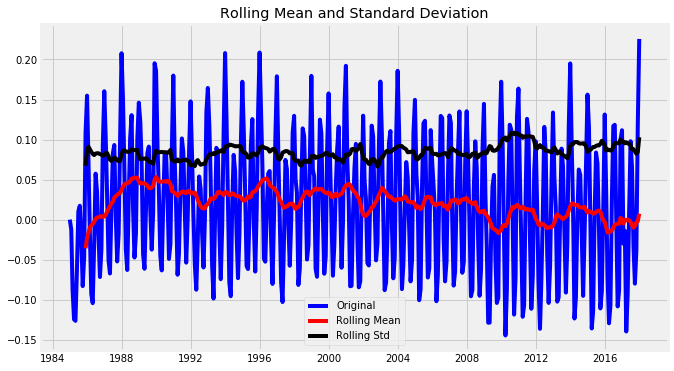

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [88]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

There can be cases when there is a high seasonality in the data.

In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.
Perform the Dickey-Fuller test (ADFT) once again.

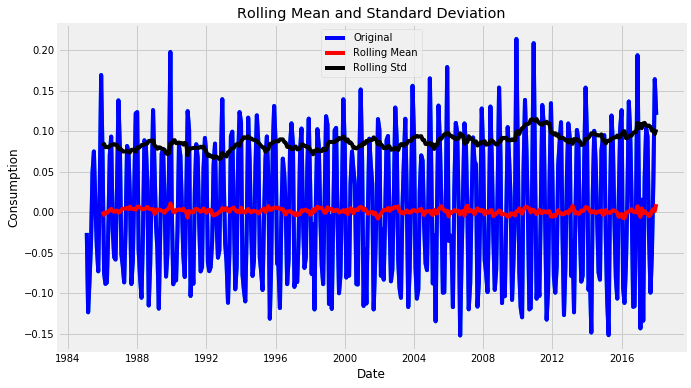

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [90]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

In [91]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

ModuleNotFoundError: No module named 'chart_studio'

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

## 3. Finding the best parameters for our model


Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.

A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:

p → Number of autoregressive terms,

d → Number of nonseasonal differences needed for stationarity, and

q → Number of lagged forecast errors in the prediction equation.

Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!

 

<b>Autocorrelation Function(ACF)</b>
 
Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

<b>Partial Autocorrelation Function(PACF)</b>
 
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.

Below code plots, both ACF and PACF plots for us:

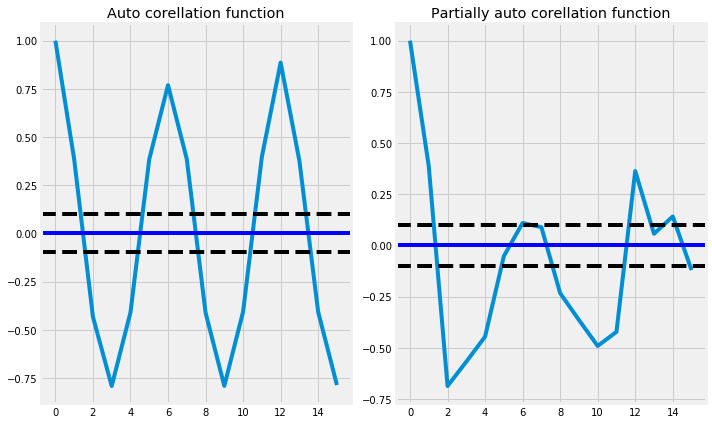

In [92]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

## 4. Fitting model

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

C:\Users\mmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS : 0.522667


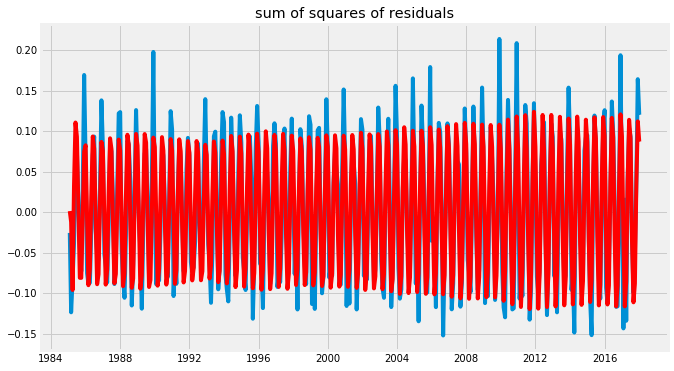

In [96]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

## 5. Predictions

Less the RSS value, the more effective the model is. You check with (2,1,0),(3,1,1), etc to look for the smallest values of RSS.

In [ ]:
The following code helps us to forecast shampoo sales for the next 6 years.

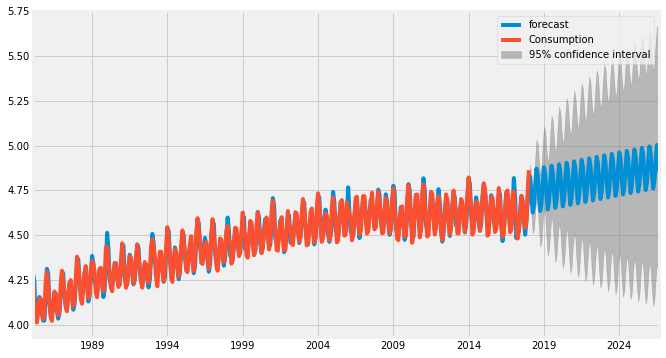

In [99]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)

Finally, we were able to build an ARIMA model and actually forecast for a future time period. Keep note that this is a basic implementation to get one started with time series forecasting. There are a lot of concepts like smoothening etc and models like ARIMAX, prophet, etc to build your time series models.

## More to go...